<a href="https://colab.research.google.com/github/Tariqul057/ML-475/blob/Project/CSE475_Project(Crop_Recomandation)_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_crop= pd.read_csv('Crop_recommendation.csv')
X = df_crop.drop(['label'], axis=1)
y = df_crop.label

In [ ]:
df_crop.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
df_crop.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
df_crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
df_crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df_crop.duplicated().sum()

0

In [ ]:
df_crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df_crop.corr(numeric_only=True) # Set numeric_only to True to only include numerical columns for correlation calculation

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

<Axes: xlabel='ph', ylabel='Density'>

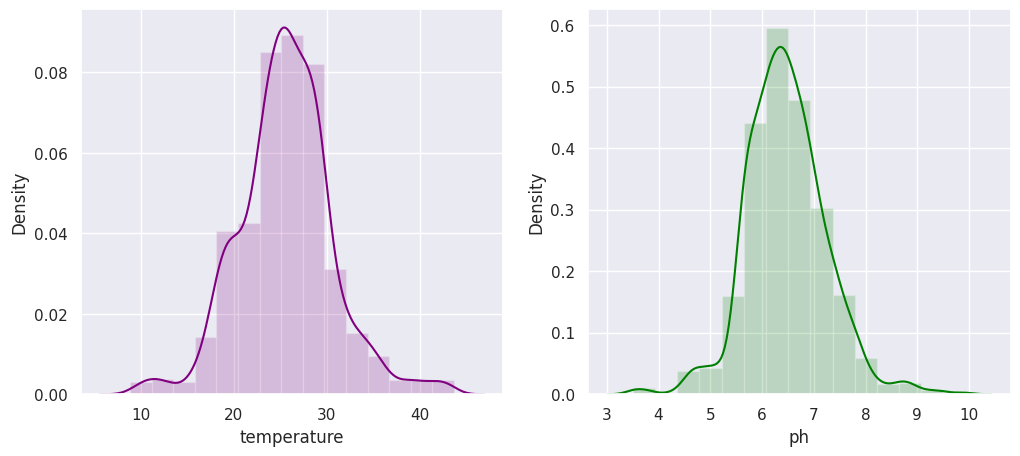

In [ ]:
import matplotlib.pyplot as plt # imports the matplotlib.pyplot module and assigns it to the alias plt
import seaborn as sns

df_crop.isnull().sum()
df_crop.duplicated().sum()
df_crop.dtypes
df_crop.corr(numeric_only=True)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df_crop['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df_crop['ph'],color="green",bins=15,hist_kws={'alpha':0.2})


<Axes: xlabel='count', ylabel='label'>

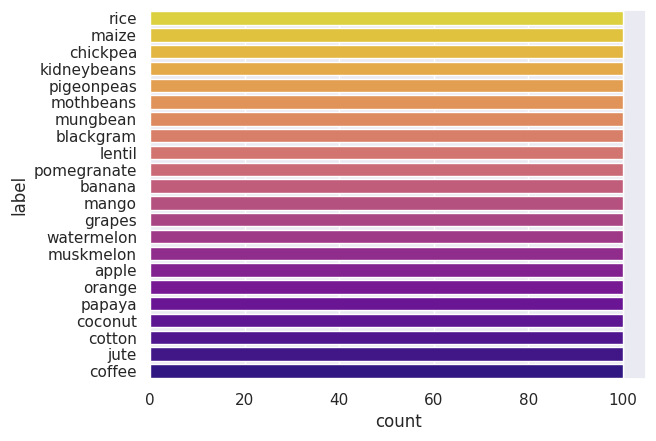

In [ ]:
sns.countplot(y='label',data=df_crop, palette="plasma_r")

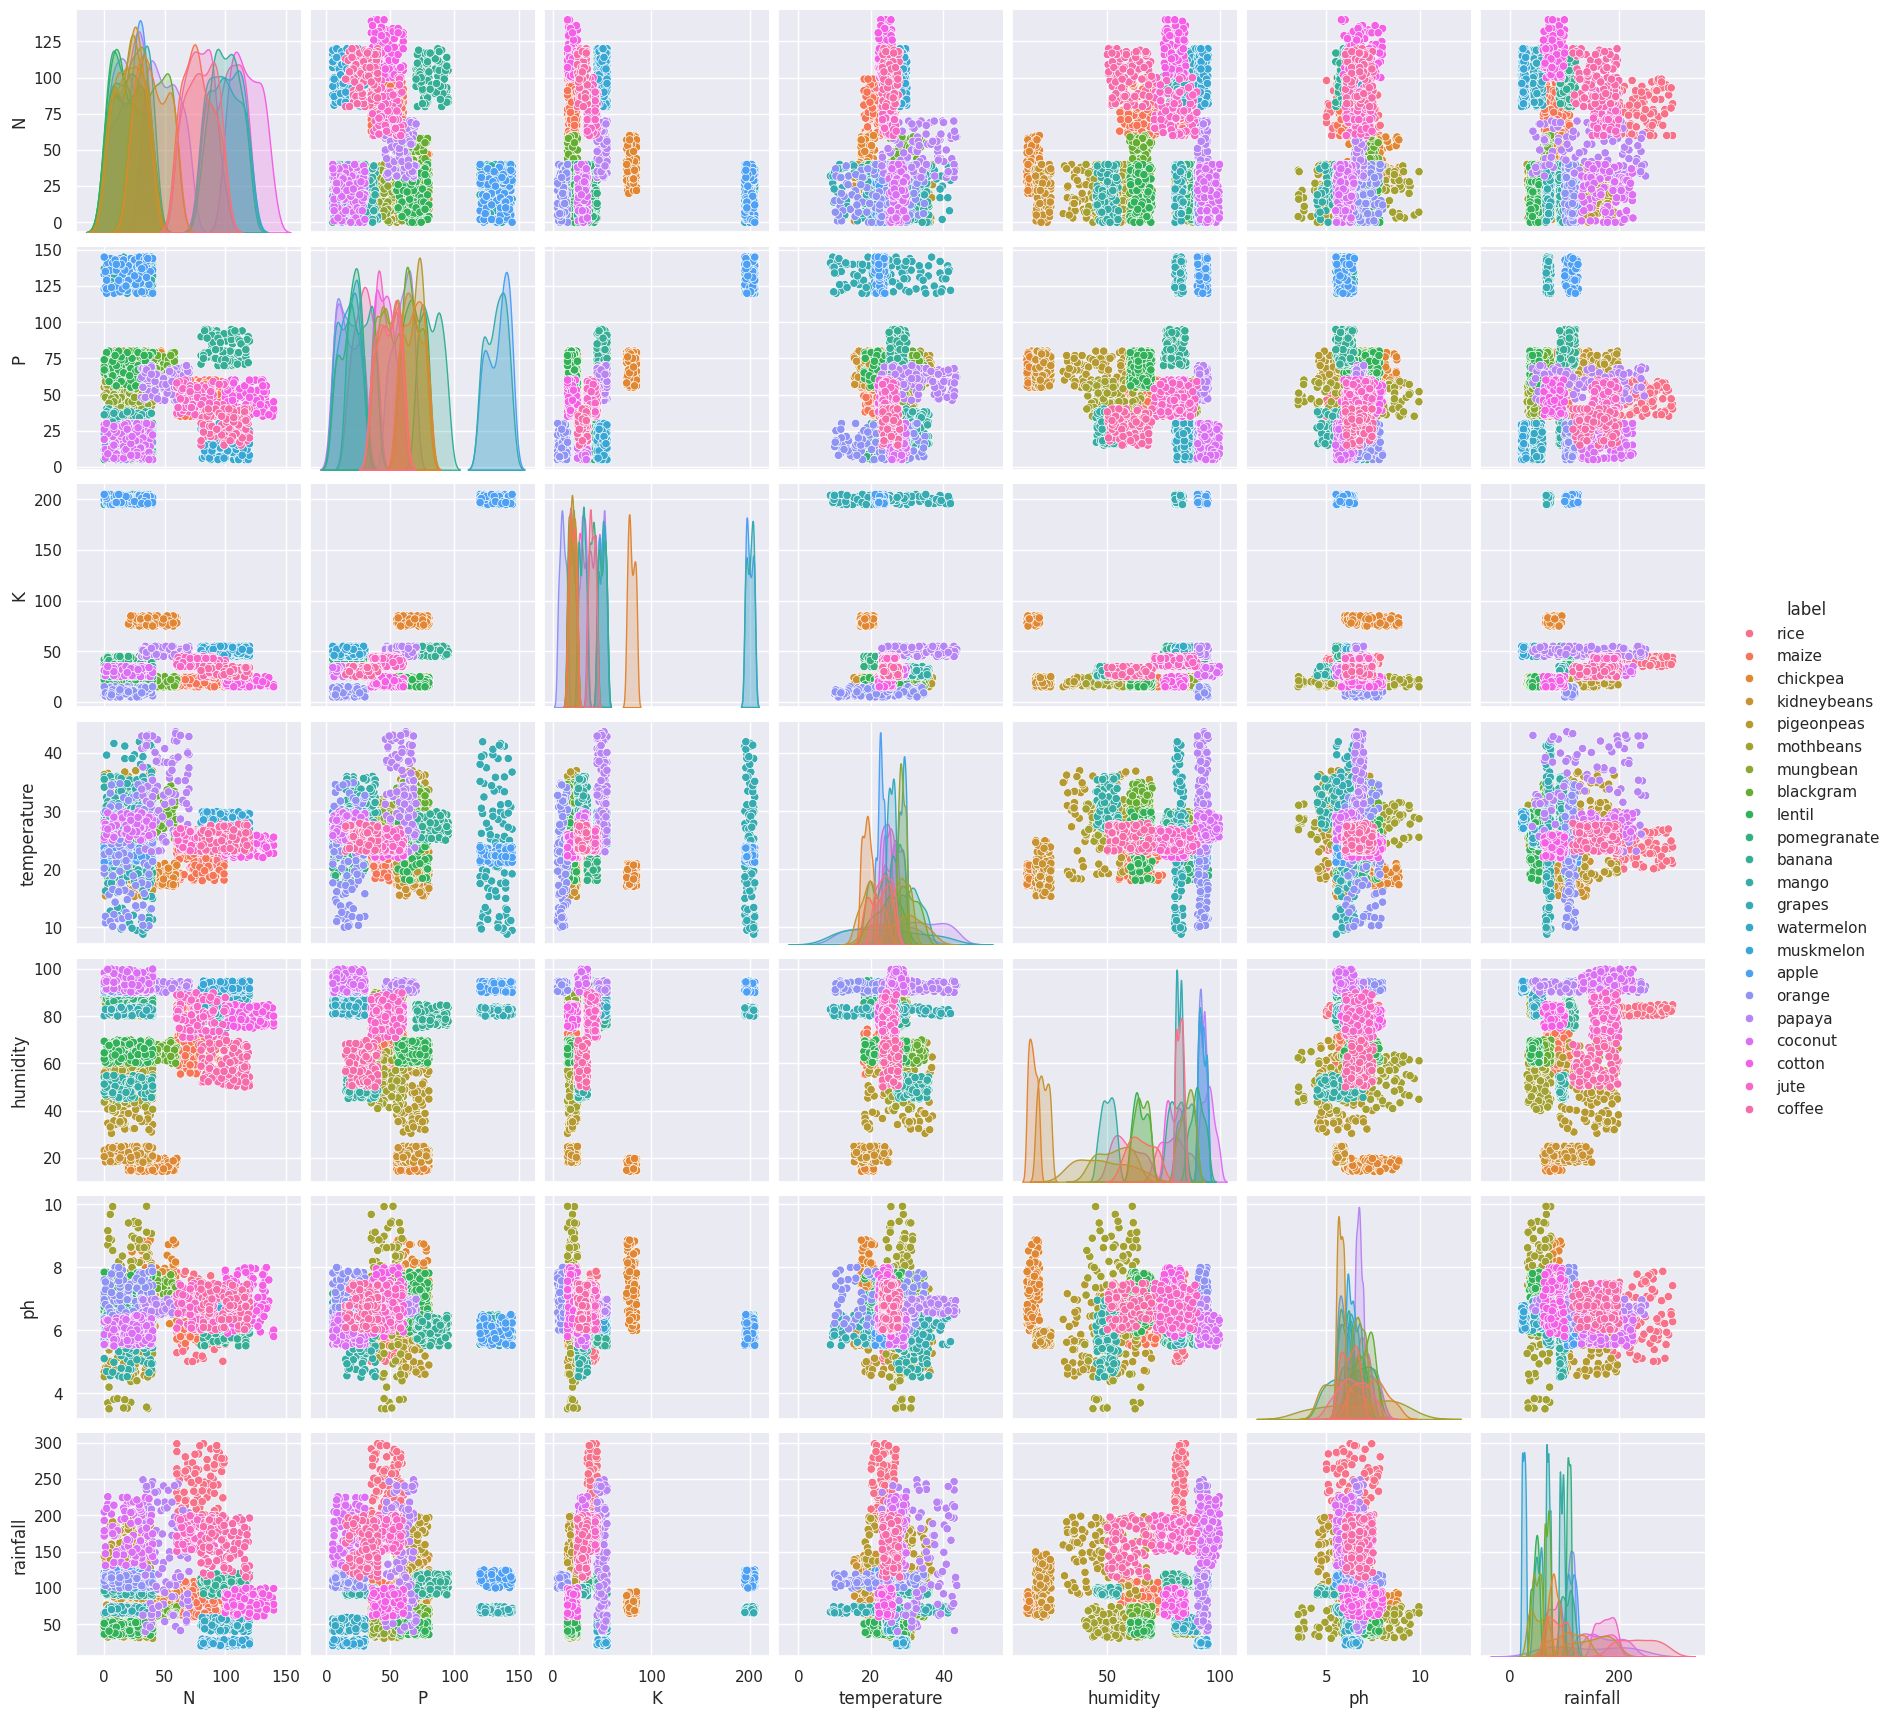

In [ ]:
sns.pairplot(df_crop, hue = 'label')

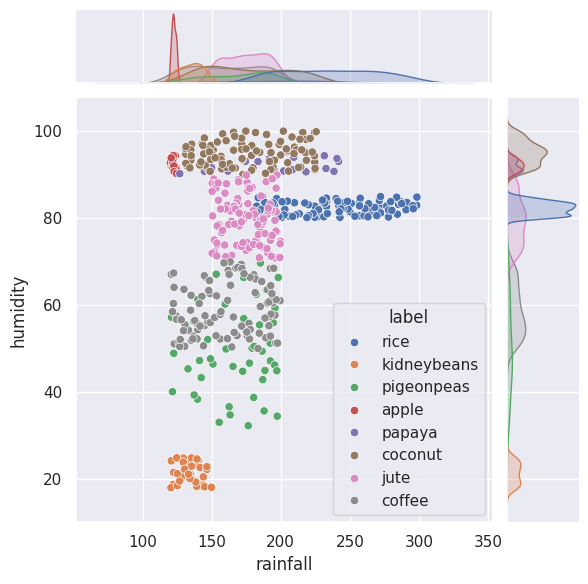

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df_crop[(df_crop['temperature']<30) & (df_crop['rainfall']>120)],hue="label")

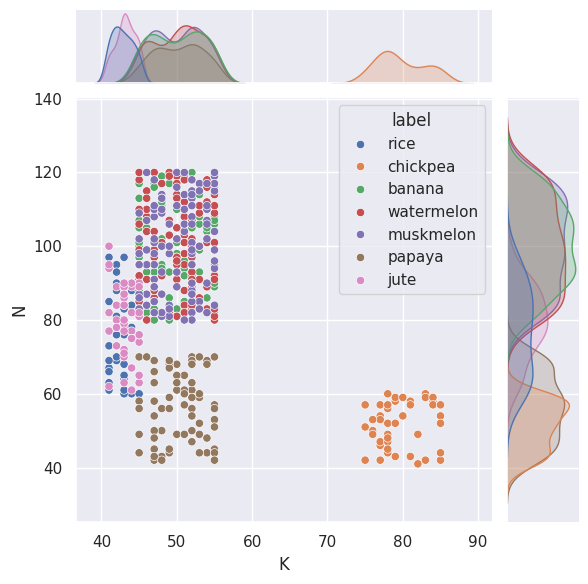

In [ ]:
sns.jointplot(x="K",y="N",data=df_crop[(df_crop['N']>40)&(df_crop['K']>40)],hue="label")

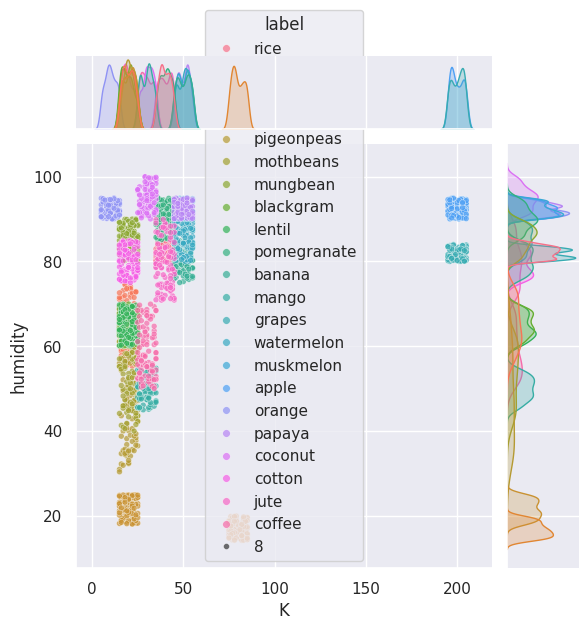

In [ ]:
sns.jointplot(x="K",y="humidity",data=df_crop,hue='label',size=8,s=30,alpha=0.7)

<Axes: xlabel='ph', ylabel='label'>

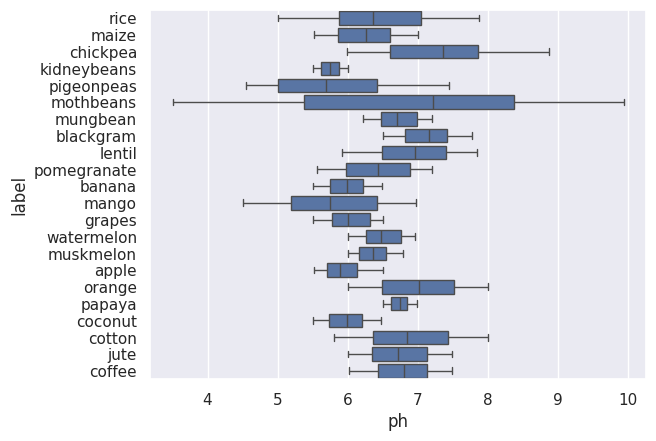

In [ ]:
sns.boxplot(y='label',x='ph',data=df_crop)

<Axes: xlabel='P', ylabel='label'>

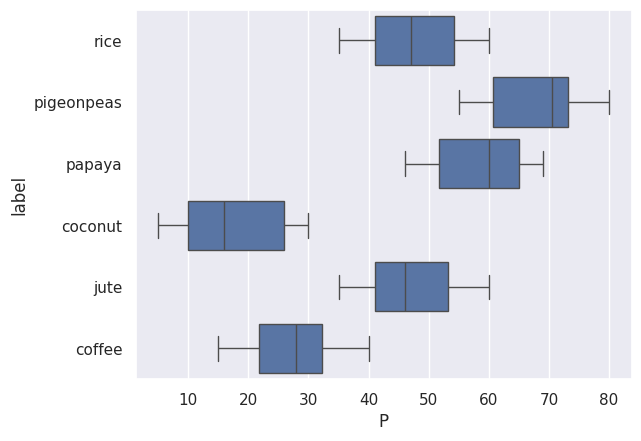

In [ ]:
sns.boxplot(y='label',x='P',data=df_crop[df_crop['rainfall']>150])

<Axes: xlabel='K', ylabel='rainfall'>

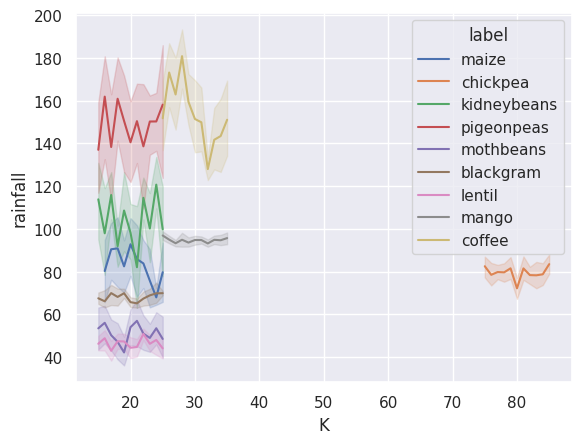

In [ ]:
sns.lineplot(data = df_crop[(df_crop['humidity']<65)], x = "K", y = "rainfall",hue="label")

In [ ]:
c=df_crop.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df_crop['target']=c.cat.codes

y=df_crop.target
X=df_crop[['N','P','K','temperature','humidity','ph','rainfall']]

<Axes: >

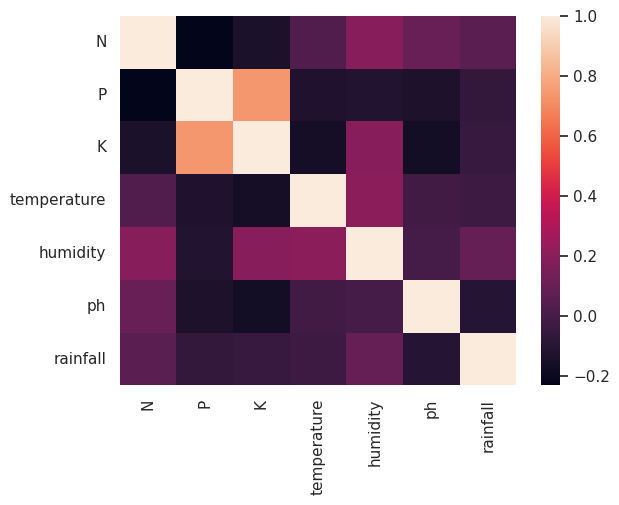

In [ ]:
sns.heatmap(X.corr())

Data Preprocessing: Standardizing

In [ ]:
# data preprocessing
from sklearn.preprocessing import StandardScaler

X_standardized = X.copy()
for col in X_standardized.columns:
    X_standardized[col] = StandardScaler().fit_transform(X_standardized[col].values.reshape(-1, 1))

X_standardized.head()

N         P         K  temperature  humidity        ph  rainfall
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373

Principle Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
df_pcs = pca.fit_transform(X_standardized.values)
df_pca = pd.DataFrame(data = df_pcs, columns = ["pc_1", "pc_2", "pc_3"])

df_pca = pd.concat([df_pca, y], axis = 1)
df_pca

pc_1      pc_2      pc_3  target
0    -0.582869  0.844586  1.373343      20
1    -0.474635  0.784895  1.252178      20
2    -0.634068  0.694522  1.179332      20
3    -1.047920  1.087658  1.393351      20
4    -0.873258  0.658673  1.455685      20
...        ...       ...       ...     ...
2195 -1.260921  0.618363  0.711297       5
2196 -1.355583  0.154043  0.701649       5
2197 -1.158384  0.640475  1.045840       5
2198 -1.219188 -0.052390  0.180855       5
2199 -1.373004 -0.055818  0.500654       5

[2200 rows x 4 columns]

In [ ]:
# show crops that need similar conditions
import plotly.express as px

df_avg_pca_proximity = df_pca.groupby('target')[['pc_1', 'pc_2', 'pc_3']].mean() # Changed 'label' to 'target'

fig = px.scatter_3d(df_avg_pca_proximity, x='pc_1', y='pc_2', z='pc_3',
                    color = df_avg_pca_proximity.index,
                    text = df_avg_pca_proximity.index,
                    title = "Which Crops Need Similar Conditions?",
                    template = 'none')
fig.update_layout(showlegend=False)
fig.show()

SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9745454545454545
Rbf Kernel Accuracy:  0.9872727272727273
Poly Kernel Accuracy:  0.9890909090909091


In [ ]:
s2 = svc_poly.score(X_test_scaled,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
print(model.best_score_ )
print(model.best_params_ )

0.9866710547967747
{'C': 1.0, 'gamma': 0.001}


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test) # Define y_pred
print(classification_report(y_test, y_pred)) # Switch the order of y_test and y_pred

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        21
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        37
           8       0.89      0.89      0.89        27
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        23
          11       1.00      0.96      0.98        24
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        19
          17       0.94    

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
s3 = dt.score(X_test,y_test)

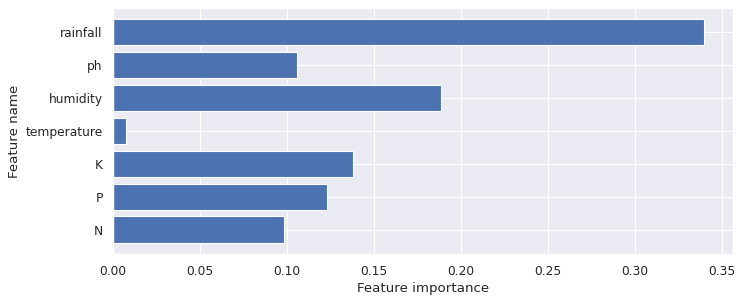

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), dt.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
y_pred = decision_tree.fit(X_train, y_train).predict(X_test)

# Removed the reference to the undefined 'metrics' object
tree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", tree_accuracy)

Accuracy: 0.9927272727272727


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      0.97      0.98        29
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        37
           8       0.93      0.96      0.94        26
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        23
          13       0.97      1.00      0.98        28
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        19
          17       1.00    

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Get predictions for both training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Combine the predictions and true labels
y_combined = np.concatenate((y_train, y_test))
y_pred_combined = np.concatenate((y_train_pred, y_test_pred))

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_combined, y_pred_combined)

print('Overall accuracy: {:.2f}'.format(overall_accuracy))

Overall accuracy: 0.97


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split


parameters = {'max_depth': [2,3,4,5,6,7,8,9,10] , 'n_estimators': list(range(10,200,10))}

# You likely already have X and y defined, so the following lines are probably unnecessary.
# Extract features (X) and target (y) from the 'data' DataFrame
# X = data.drop('label', axis=1)  # Assuming 'label' is your target variable column
# y = data['label']

# Split data into training and testing sets - This might also be unnecessary if you have X_train, etc. already
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]})

In [ ]:
model.best_score_

0.9957597733844237

In [ ]:
model.best_params_

{'max_depth': 10, 'n_estimators': 160}

In [ ]:
rf1 = RandomForestClassifier(max_depth=10,n_estimators=60,random_state=42).fit(X_train, y_train)

In [ ]:
rf1.score(X_test,y_test)

0.9945454545454545

In [ ]:
rf2 = RandomForestClassifier(max_depth=9,n_estimators=100,random_state=42).fit(X_train, y_train)
s4 = rf2.score(X_test,y_test)

In [ ]:
# Assuming 'rf2' is your trained model
y_pred = rf2.predict(X_test) # Predict on the test data
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      0.97      0.98        29
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        37
           8       1.00      0.93      0.96        29
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        23
          13       0.97      1.00      0.98        28
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        19
          17       1.00    

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # import the accuracy_score function from sklearn.metrics

log_reg = LogisticRegression(random_state = 42)
y_pred = log_reg.fit(X_train, y_train).predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, y_pred) # use the imported function
print("Accuracy:", logistic_regression_accuracy)

Accuracy: 0.9727272727272728


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       0.96      0.96      0.96        28
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        23
           5       1.00      0.95      0.98        22
           6       0.97      0.94      0.95        31
           7       1.00      1.00      1.00        37
           8       0.93      0.89      0.91        28
           9       1.00      1.00      1.00        27
          10       0.96      0.88      0.92        25
          11       0.88      0.95      0.91        22
          12       1.00      1.00      1.00        23
          13       0.97      0.97      0.97        29
          14       0.96      1.00      0.98        25
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        19
          17       0.87    

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # import the StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform your test data
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

In [ ]:
k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)

In [ ]:
model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [ ]:
s1 = model.best_score_

In [ ]:
model.best_params_

{'n_neighbors': 1}

<Axes: >

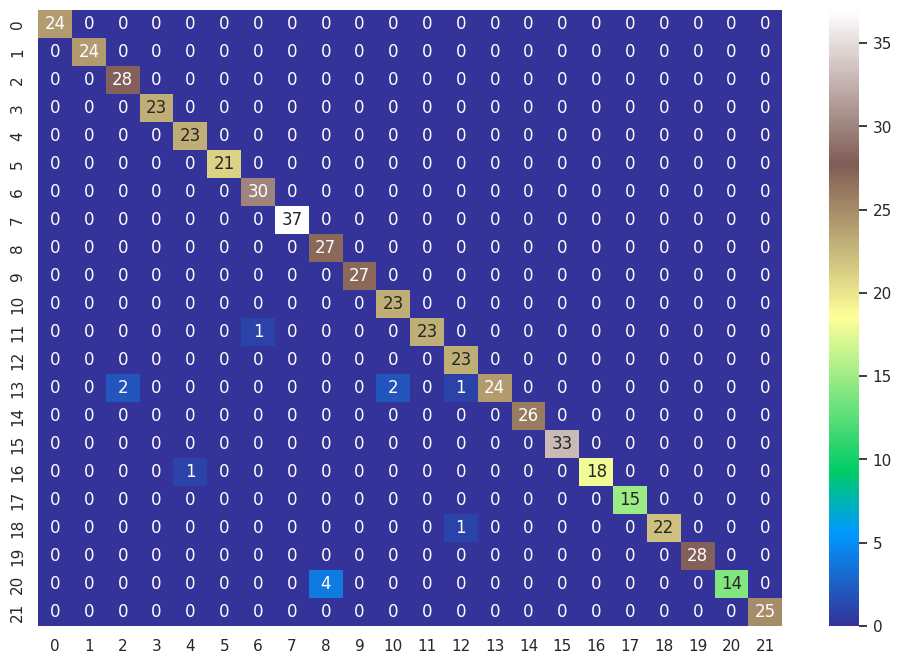

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np #Added import statement for numpy

# Get unique classes from y_test
classes = np.unique(y_test)

# Create a dictionary mapping class indices to labels
targets = {i: str(i) for i in classes}

mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values())) # Use the generated targets dictionary
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

Naive Bias

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb.score(X_test_scaled, y_test)


0.9945454545454545

ANN

In [ ]:
#uniques in label column
print(df_crop.label.unique())
print("Total unique values in Label columns are: ",len(df_crop.label.unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Total unique values in Label columns are:  22


In [ ]:
# drop target and label column for x and y

X = df_crop.drop(['label', 'target'], axis=1)
y = df_crop[['label']] # Use a list of column names to select multiple columns
print(X.shape)
print(y.shape)

(2200, 7)
(2200, 1)


In [ ]:
X

N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

In [ ]:
y

label
0       rice
1       rice
2       rice
3       rice
4       rice
...      ...
2195  coffee
2196  coffee
2197  coffee
2198  coffee
2199  coffee

[2200 rows x 1 columns]

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder # import LabelEncoder from sklearn

l_encode = LabelEncoder()
l_encode.fit(y)
y = l_encode.transform(y)
print(y)
y = to_categorical(y)
y

[20 20 20 ...  5  5  5]


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in X.columns:
            x = np.array(X[col]).reshape(-1,1)
            X[col]=scaler.fit_transform(x)

In [ ]:
#Splitting training data and testing data using train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
encoding=['rice' ,'maize', 'chickpea', 'kidneybeans', 'pigeonpeas' ,'mothbeans',
 'mungbean', 'blackgram','lentil' ,'pomegranate', 'banana' ,'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange' ,'papaya', 'coconut', 'cotton',
 'jute', 'coffee']

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Splitting training data and testing data using train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42, test_size=0.2)

# Apply scaling after the split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Import tensorflow
import tensorflow as tf

from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Build the model with additional layers and dropout to reduce overfitting
model = Sequential()

# Input layer
model.add(Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'))

# Hidden layer 1
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Hidden layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Hidden layer 3
model.add(Dense(16, activation='relu'))

# Output layer (for multi-class classification)
model.add(Dense(22, activation='softmax'))  # Use 'softmax' for multi-class classification

# Step 2: Compile the model with Adam optimizer and learning rate reduction
optimizer = Adam(learning_rate=0.001)

# Use categorical_crossentropy for multi-class classification
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Step 3: Use early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Step 4: Train the model with validation data and callbacks
# Ensure that X_train_scaled and y_train have the same number of samples
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping, lr_reduction])

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.0519 - loss: 3.0501 - val_accuracy: 0.1909 - val_loss: 2.8280 - learning_rate: 0.0010
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1234 - loss: 2.8294 - val_accuracy: 0.2750 - val_loss: 2.5179 - learning_rate: 0.0010
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2001 - loss: 2.5554 - val_accuracy: 0.4023 - val_loss: 2.0888 - learning_rate: 0.0010
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2749 - loss: 2.2402 - val_accuracy: 0.5568 - val_loss: 1.6873 - learning_rate: 0.0010
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3509 - loss: 1.9500 - val_accuracy: 0.6023 - val_loss: 1.3501 - learning_rate: 0.0010
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3930 - loss: 1.7537 - val_accuracy: 0.6545 - val_loss: 1.1395 - learning_rate: 0.0010
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4466 - loss: 1.5694 - val_

In [ ]:
# Step 6: Predict and get classification report
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # For binary classification

# Print the classification report
print(classification_report(y_test, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.79      0.96      0.86        23
           9       0.90      0.95      0.93        20
          10       0.85      1.00      0.92        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.0

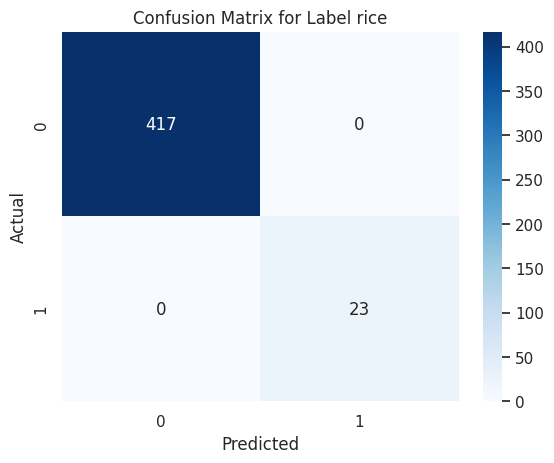

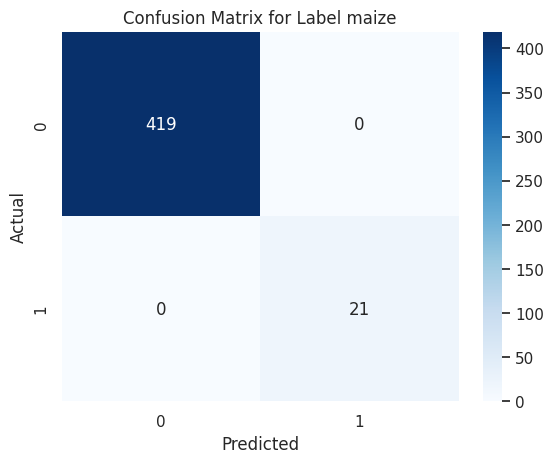

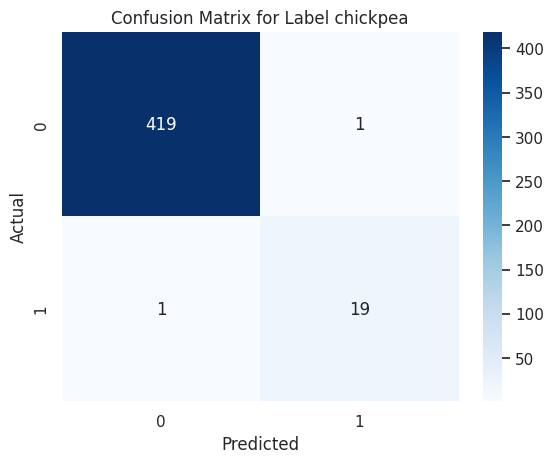

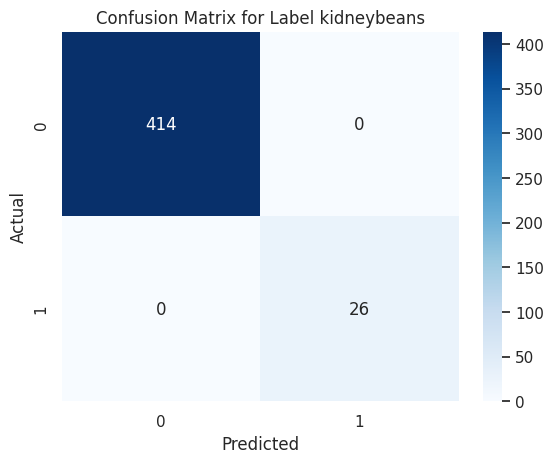

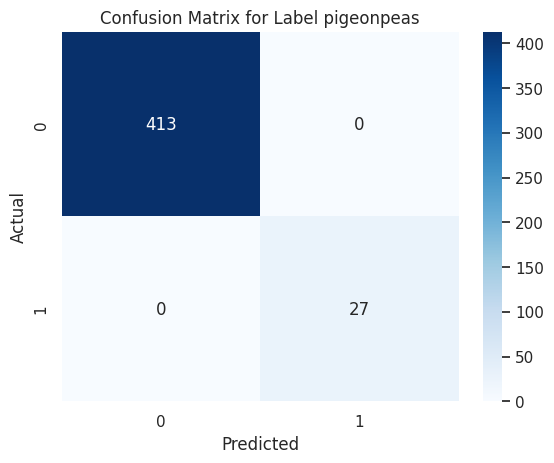

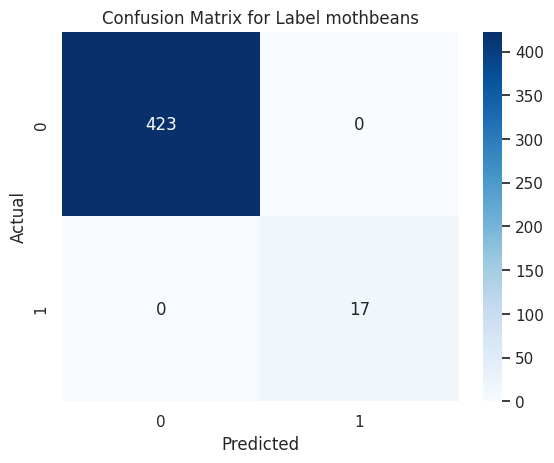

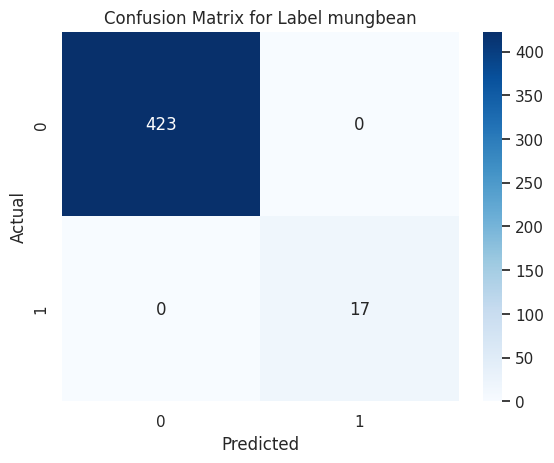

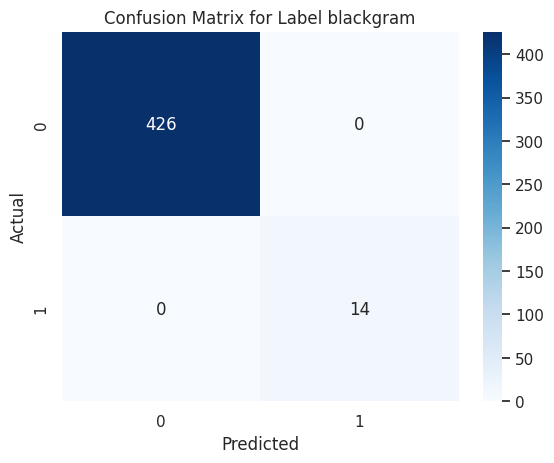

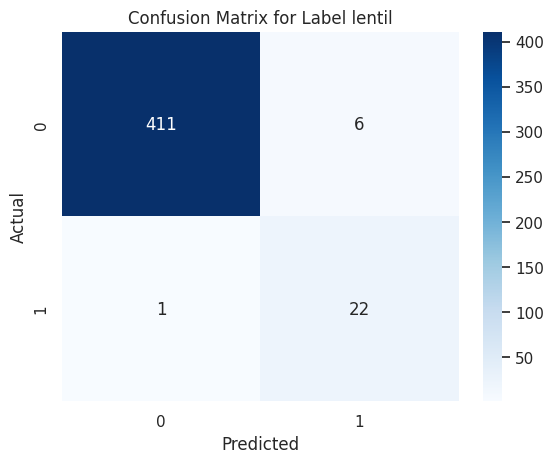

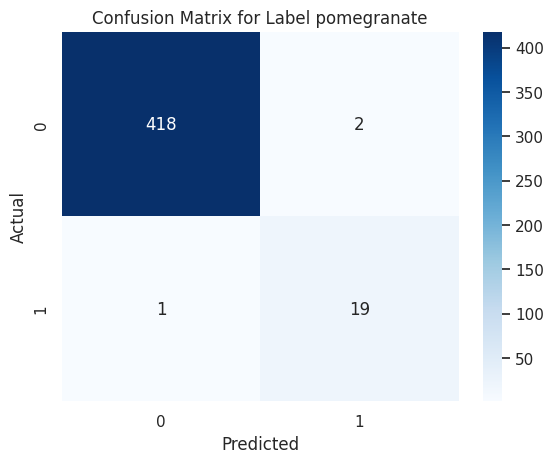

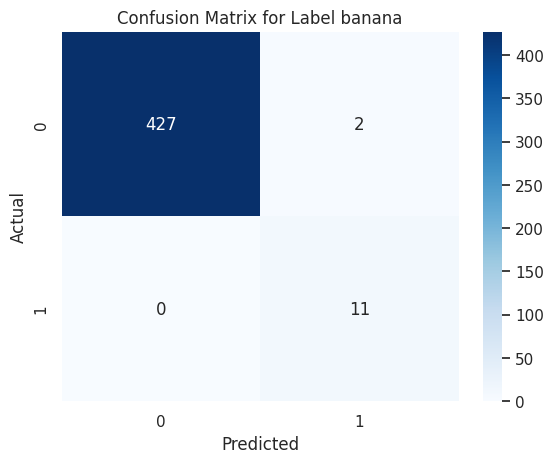

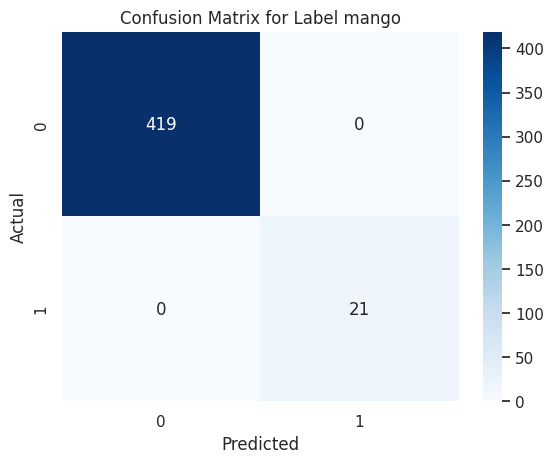

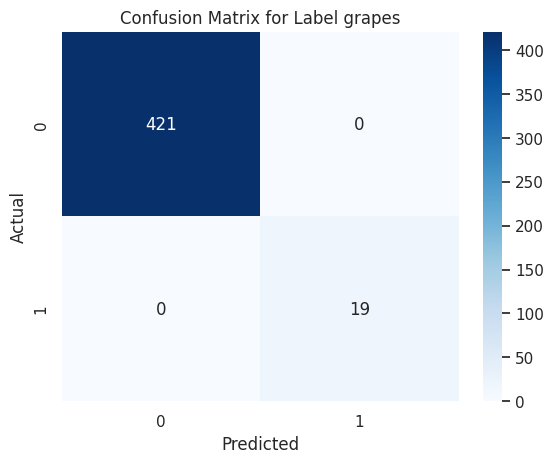

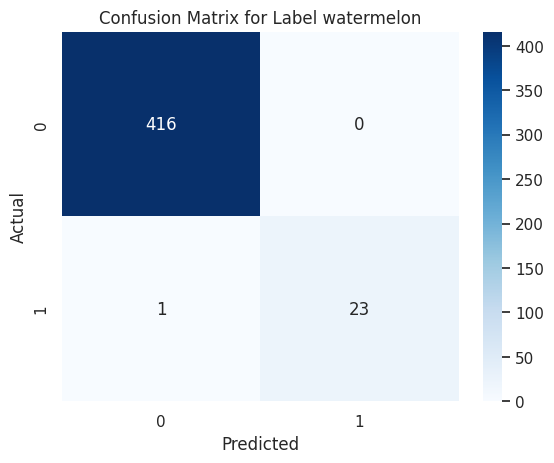

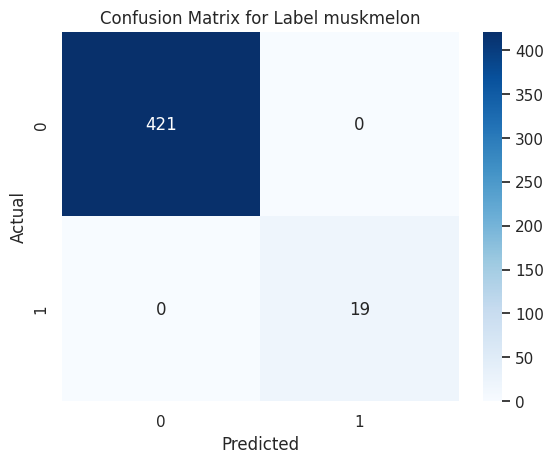

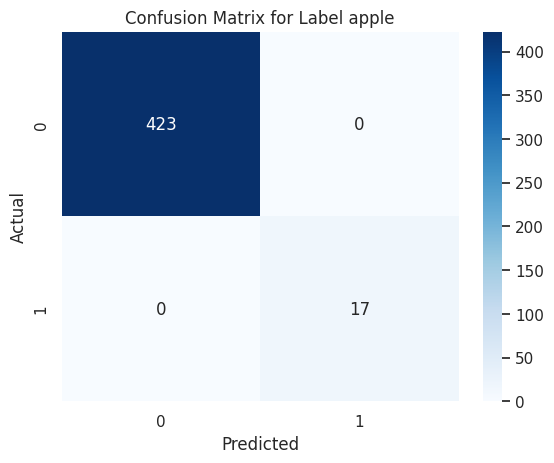

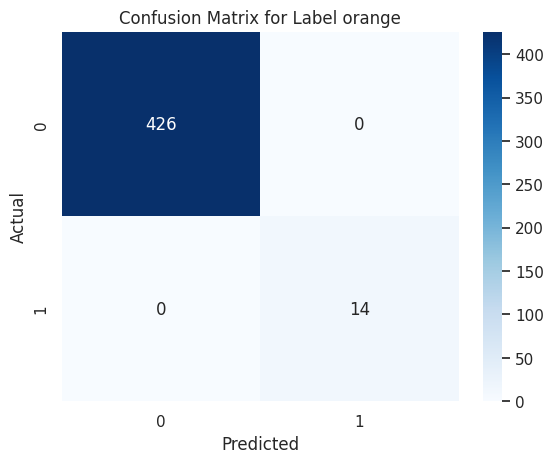

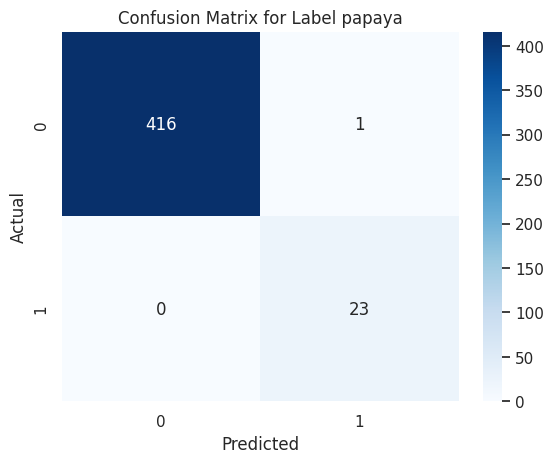

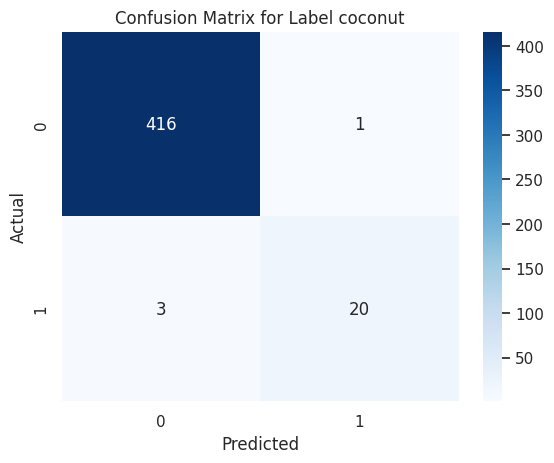

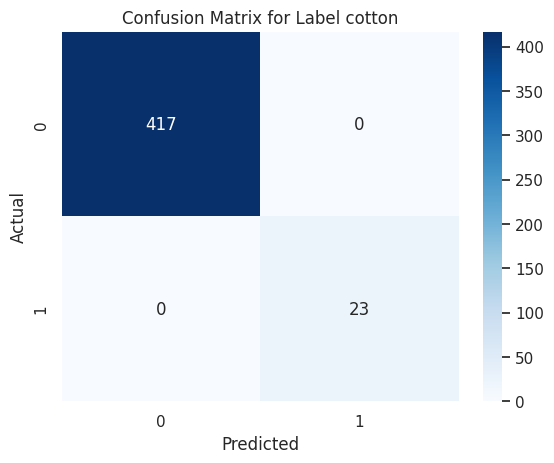

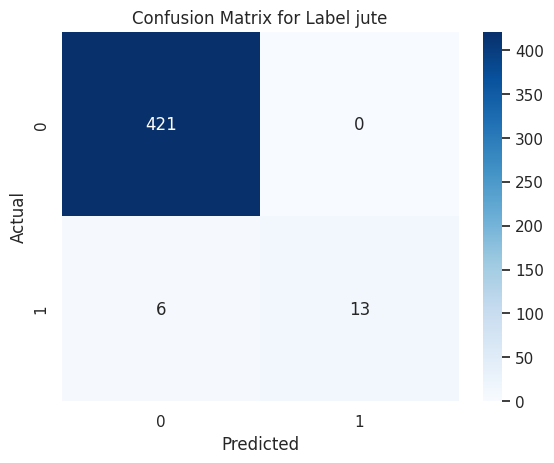

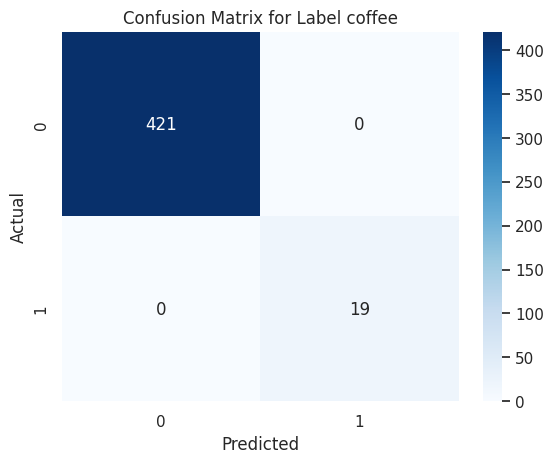

In [ ]:
# Step 7: Plot confusion matrix for multilabel data
from sklearn.metrics import multilabel_confusion_matrix # import the missing function

mat = multilabel_confusion_matrix(y_test, y_pred)

# Plot confusion matrices for each label
for i, matrix in enumerate(mat):
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for Label {encoding[i]}')
    plt.show()

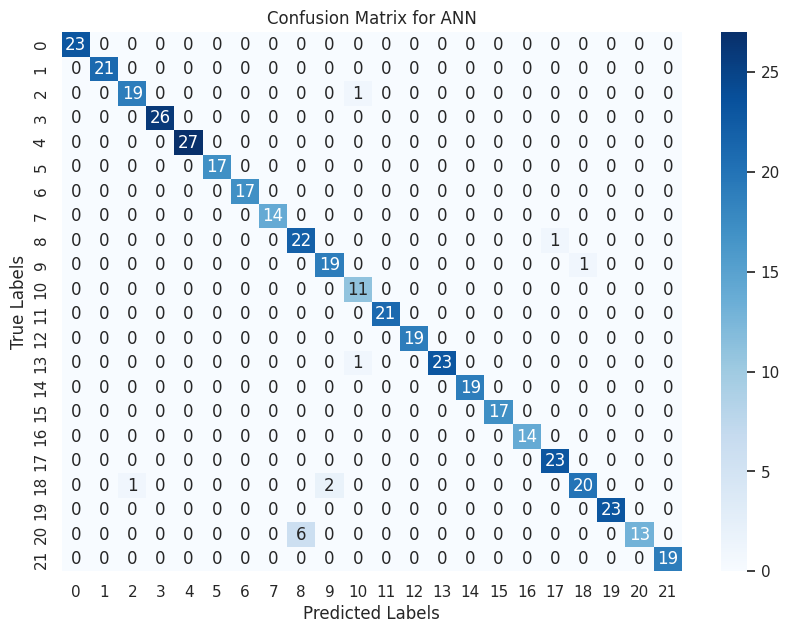

In [ ]:
# Step 7: Plot confusion matrix for multilabel data


mat = multilabel_confusion_matrix(y_test, y_pred)

# Convert one-hot encoded y_test and y_pred back to class labels
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for ANN")
plt.show()

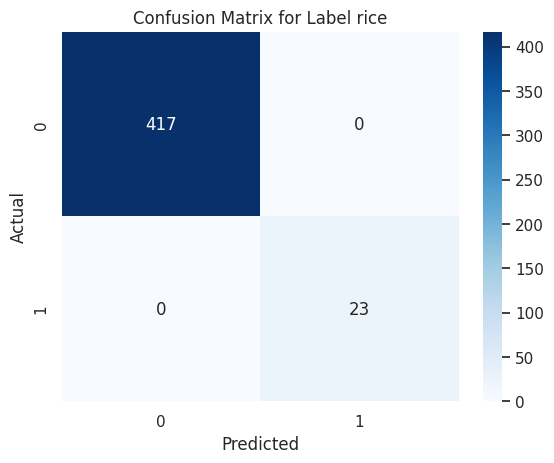

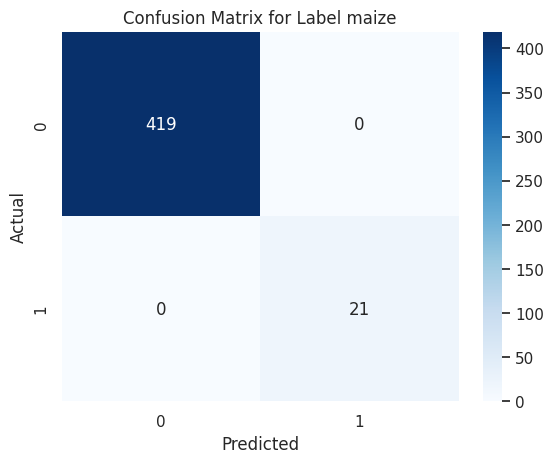

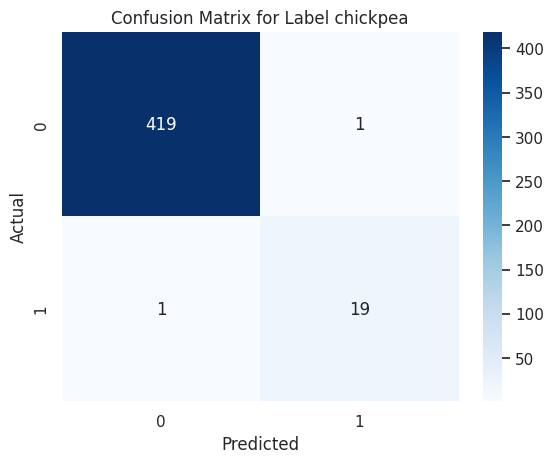

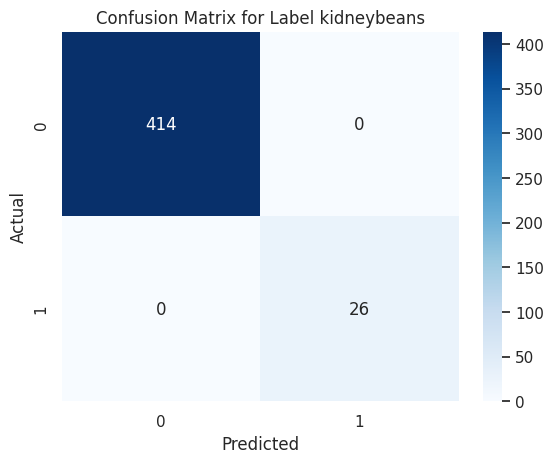

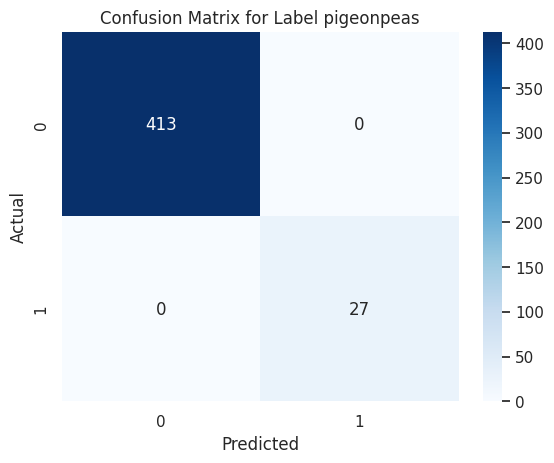

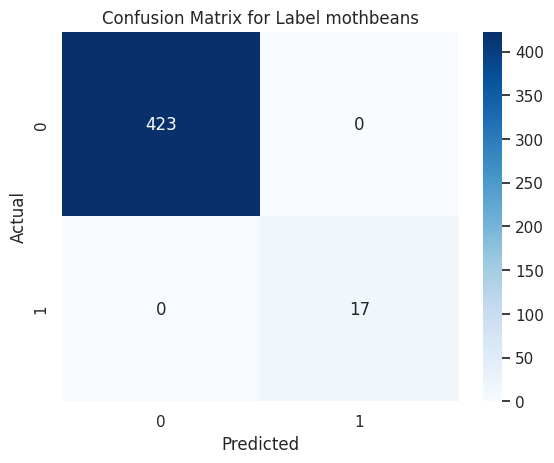

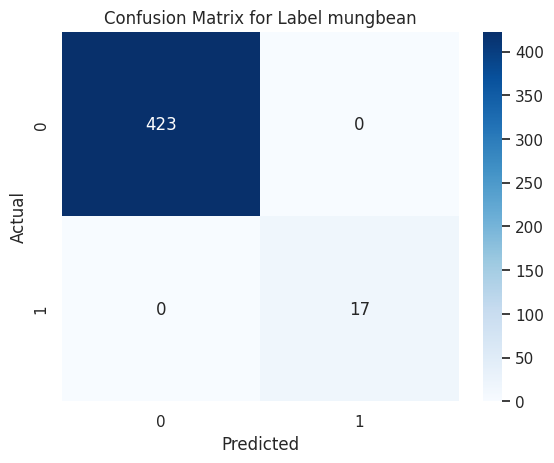

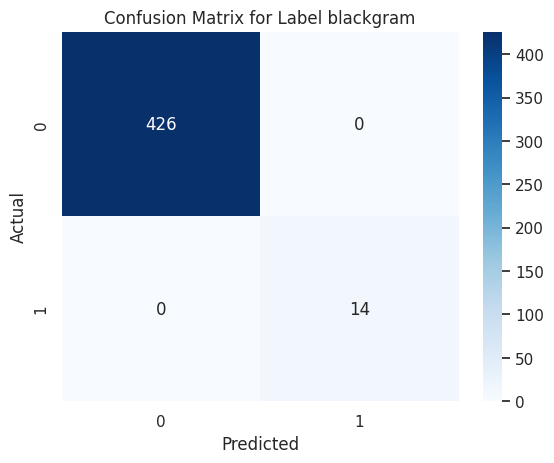

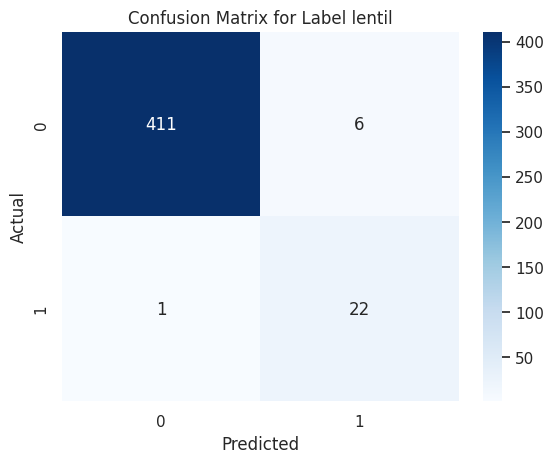

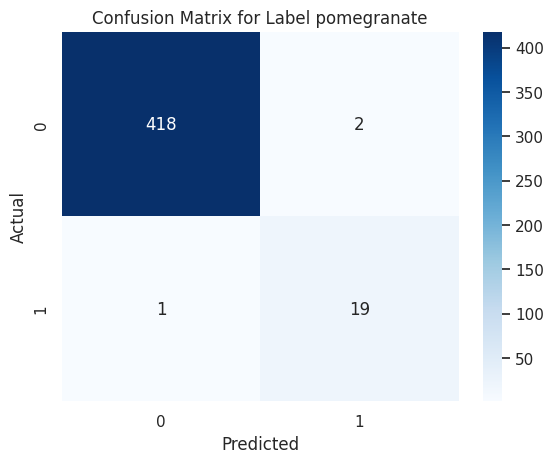

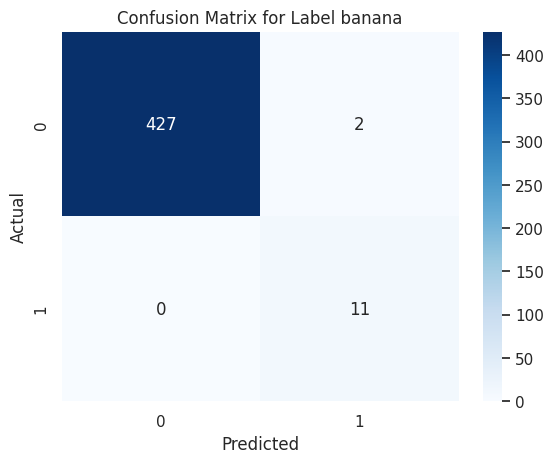

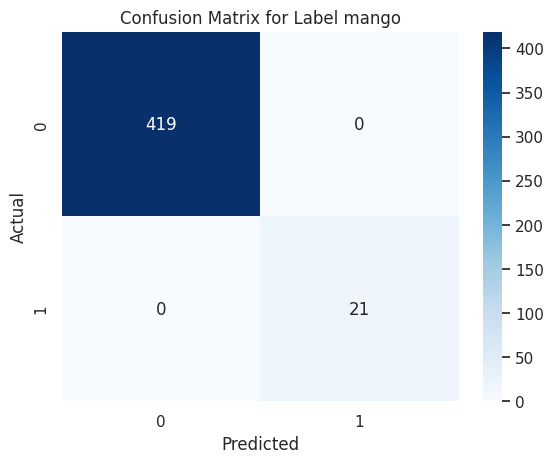

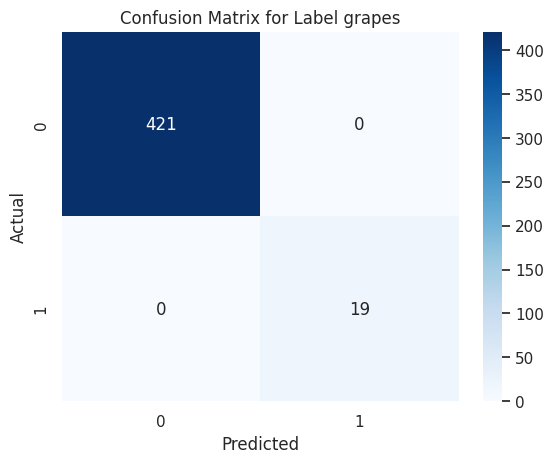

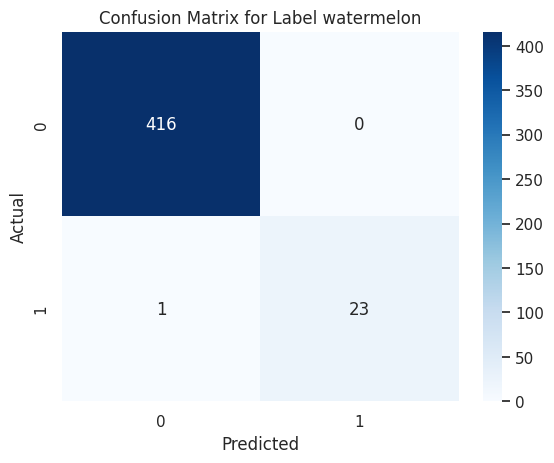

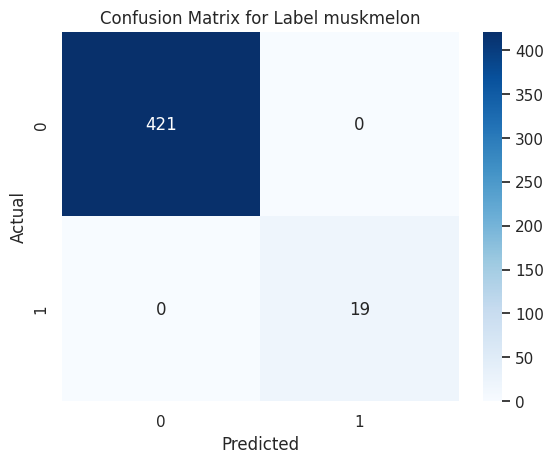

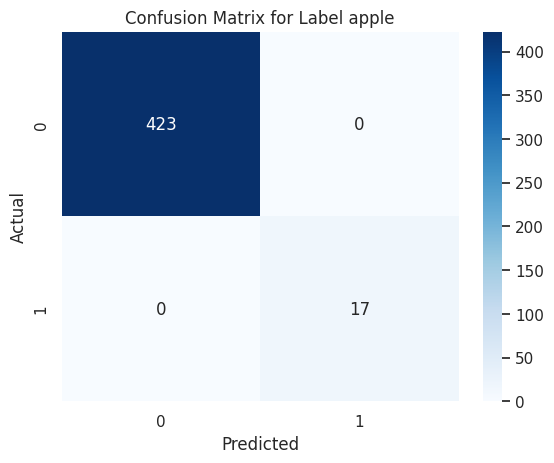

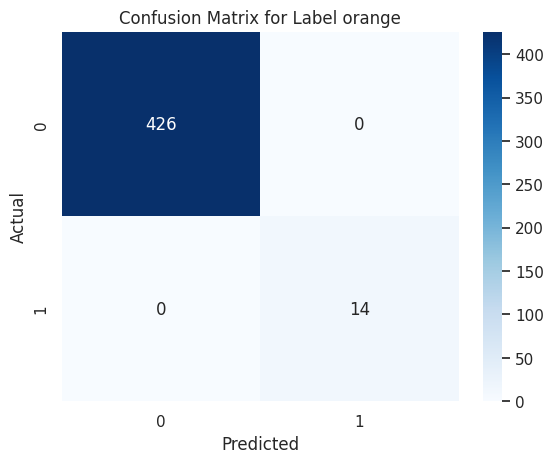

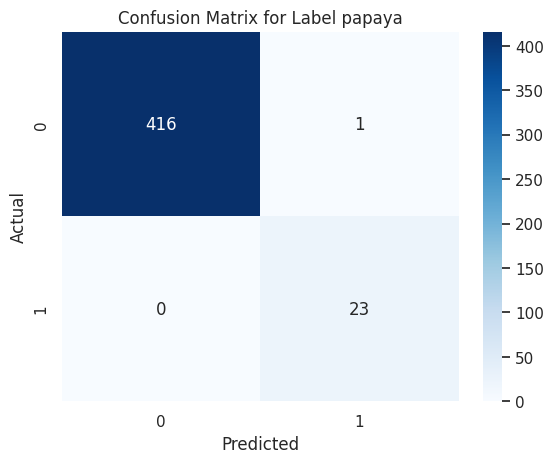

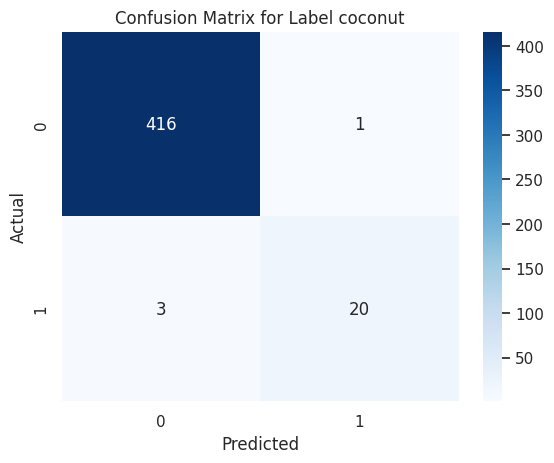

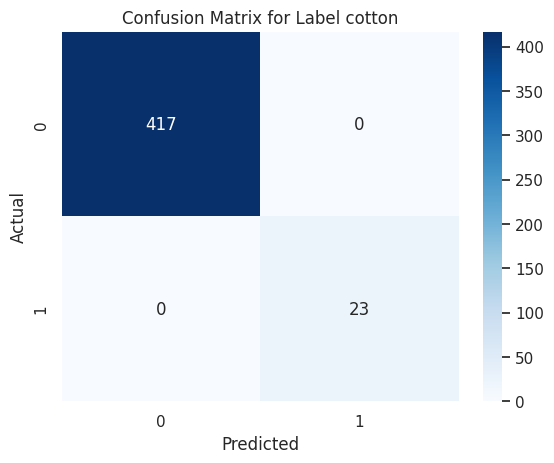

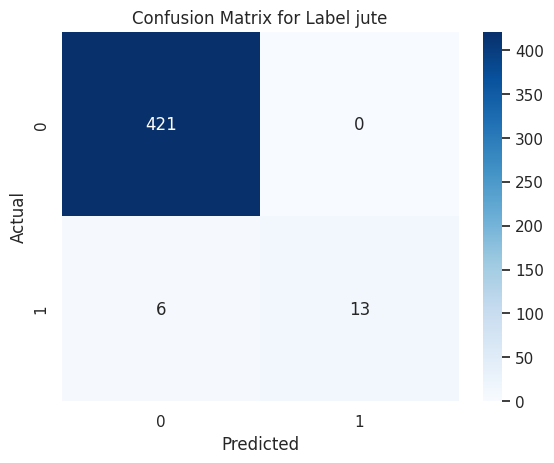

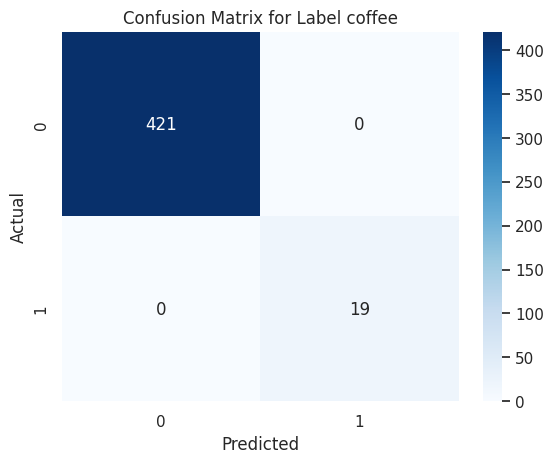

In [ ]:
# Plot confusion matrices for each label
for i, matrix in enumerate(mat):
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for Label {encoding[i]}')
    plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_test' is one-hot encoded and 'knn' outputs single labels
le = LabelEncoder()  # Create a LabelEncoder object
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn = le.fit_transform(y_pred_knn) # Convert knn predictions to encoded format
y_test_encoded = np.argmax(y_test, axis=1) # Convert y_test to encoded format

classification_performance = {
    'Classification Procedure': ['Logistic Regression', 'KNN', 'SVM (RBF)', 'Decision Tree', 'Random Forest' ,'ANN'],
    'Accuracy': [logistic_regression_accuracy, accuracy_score(y_test_encoded, y_pred_knn), s2, s3, s4, test_acc] # Use accuracy_score with encoded labels
}
classification_performance = pd.DataFrame.from_dict(classification_performance)
print(classification_performance)

  Classification Procedure  Accuracy
0      Logistic Regression  0.972727
1                      KNN  0.968182
2                SVM (RBF)  0.989091
3            Decision Tree  0.987273
4            Random Forest  0.994545
5                      ANN  0.970455
